In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
df.describe()

year        score         votes        budget         gross  \
count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03   
mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
min    1980.000000     1.900000  7.000000e+00  3.000000e+03  3.090000e+02   
25%    1991.000000     5.800000  9.100000e+03  1.000000e+07  4.532056e+06   
50%    2000.000000     6.500000  3.300000e+04  2.050000e+07  2.020576e+07   
75%    2010.000000     7.100000  9.300000e+04  4.500000e+07  7.601669e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  7664.000000  
mean    107.261613  
std      18.581247  
min      55.000000  
25%      95.000000  
50%     104.000000  
75%     116.000000  
max     366.000000

In [7]:
df['rating'].fillna(value='unknown',inplace = True)

In [8]:
df['released'].fillna(value ='unknown',inplace = True)

In [9]:
df['score'].fillna(value = 6,inplace = True)

In [10]:
df['votes'].fillna(value = 9,inplace = True)

In [11]:
df['writer'].fillna(value = 'unknown',inplace = True)

In [12]:
df['star'].fillna(value = 'unknown',inplace = True)

In [13]:
df['country'].fillna(value = 'unknown',inplace = True)

In [14]:
df['budget'].fillna(value=3,inplace = True)

In [15]:
df['gross'].fillna(value =8,inplace = True)

In [16]:
df['company'].fillna(value='unknown',inplace = True)

In [17]:
df['runtime'].fillna(value = 107,inplace = True)

In [18]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [19]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

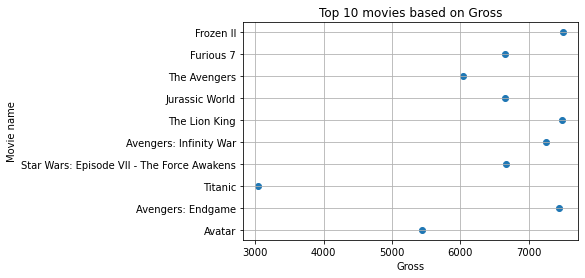

In [20]:
top10_movies_gross = df.nlargest(10,'gross')['name']
plt.scatter(top10_movies_gross.index,top10_movies_gross.values)
plt.xlabel('Gross')
plt.ylabel('Movie name')
plt.title('Top 10 movies based on Gross')
plt.grid(True)
plt.show()

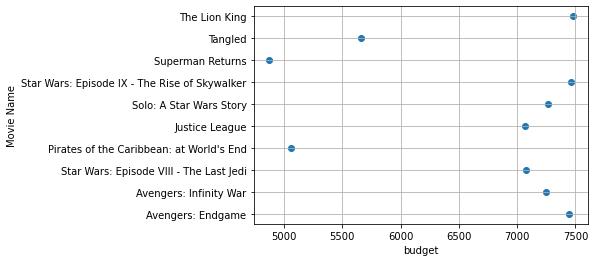

In [21]:
top10_movies_budget = df.nlargest(10,'budget')['name']
plt.scatter(top10_movies_budget.index,top10_movies_budget.values)
plt.xlabel('budget')
plt.ylabel('Movie Name')
plt.grid(True)
plt.show()

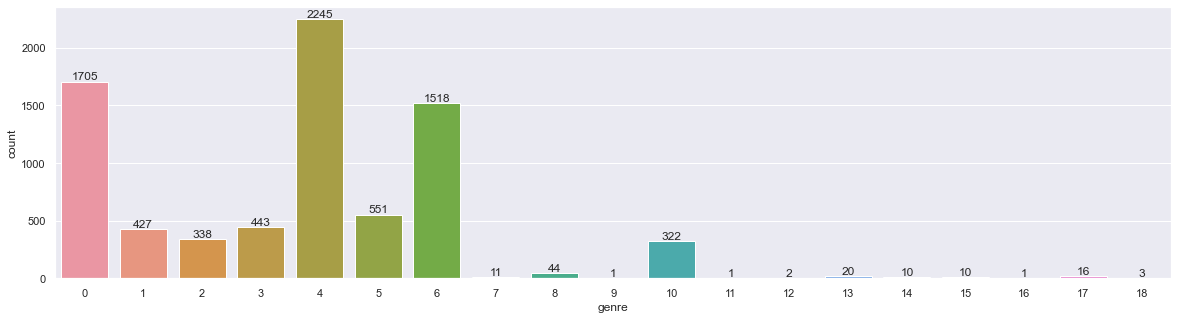

In [68]:
ax =sns.countplot(x = 'genre',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc = {'figure.figsize':(20,5)})

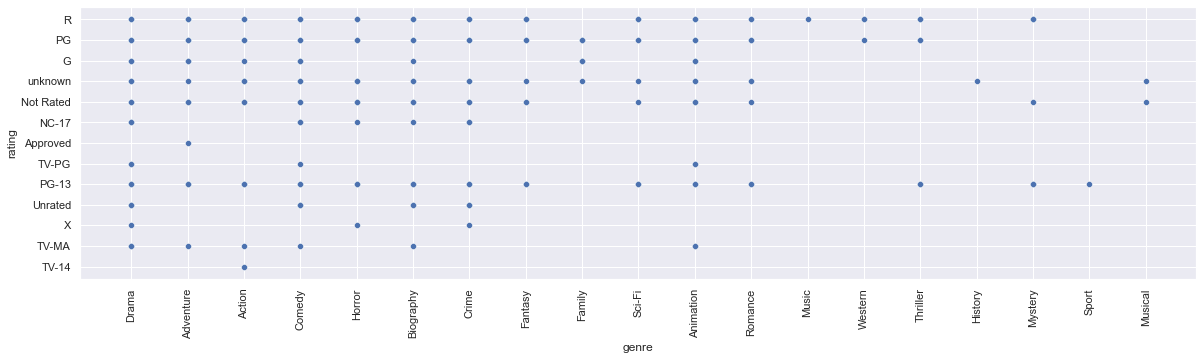

In [23]:
sns.scatterplot(x='genre',y='rating',data= df)
plt.xticks(rotation = 'vertical')
plt.show()

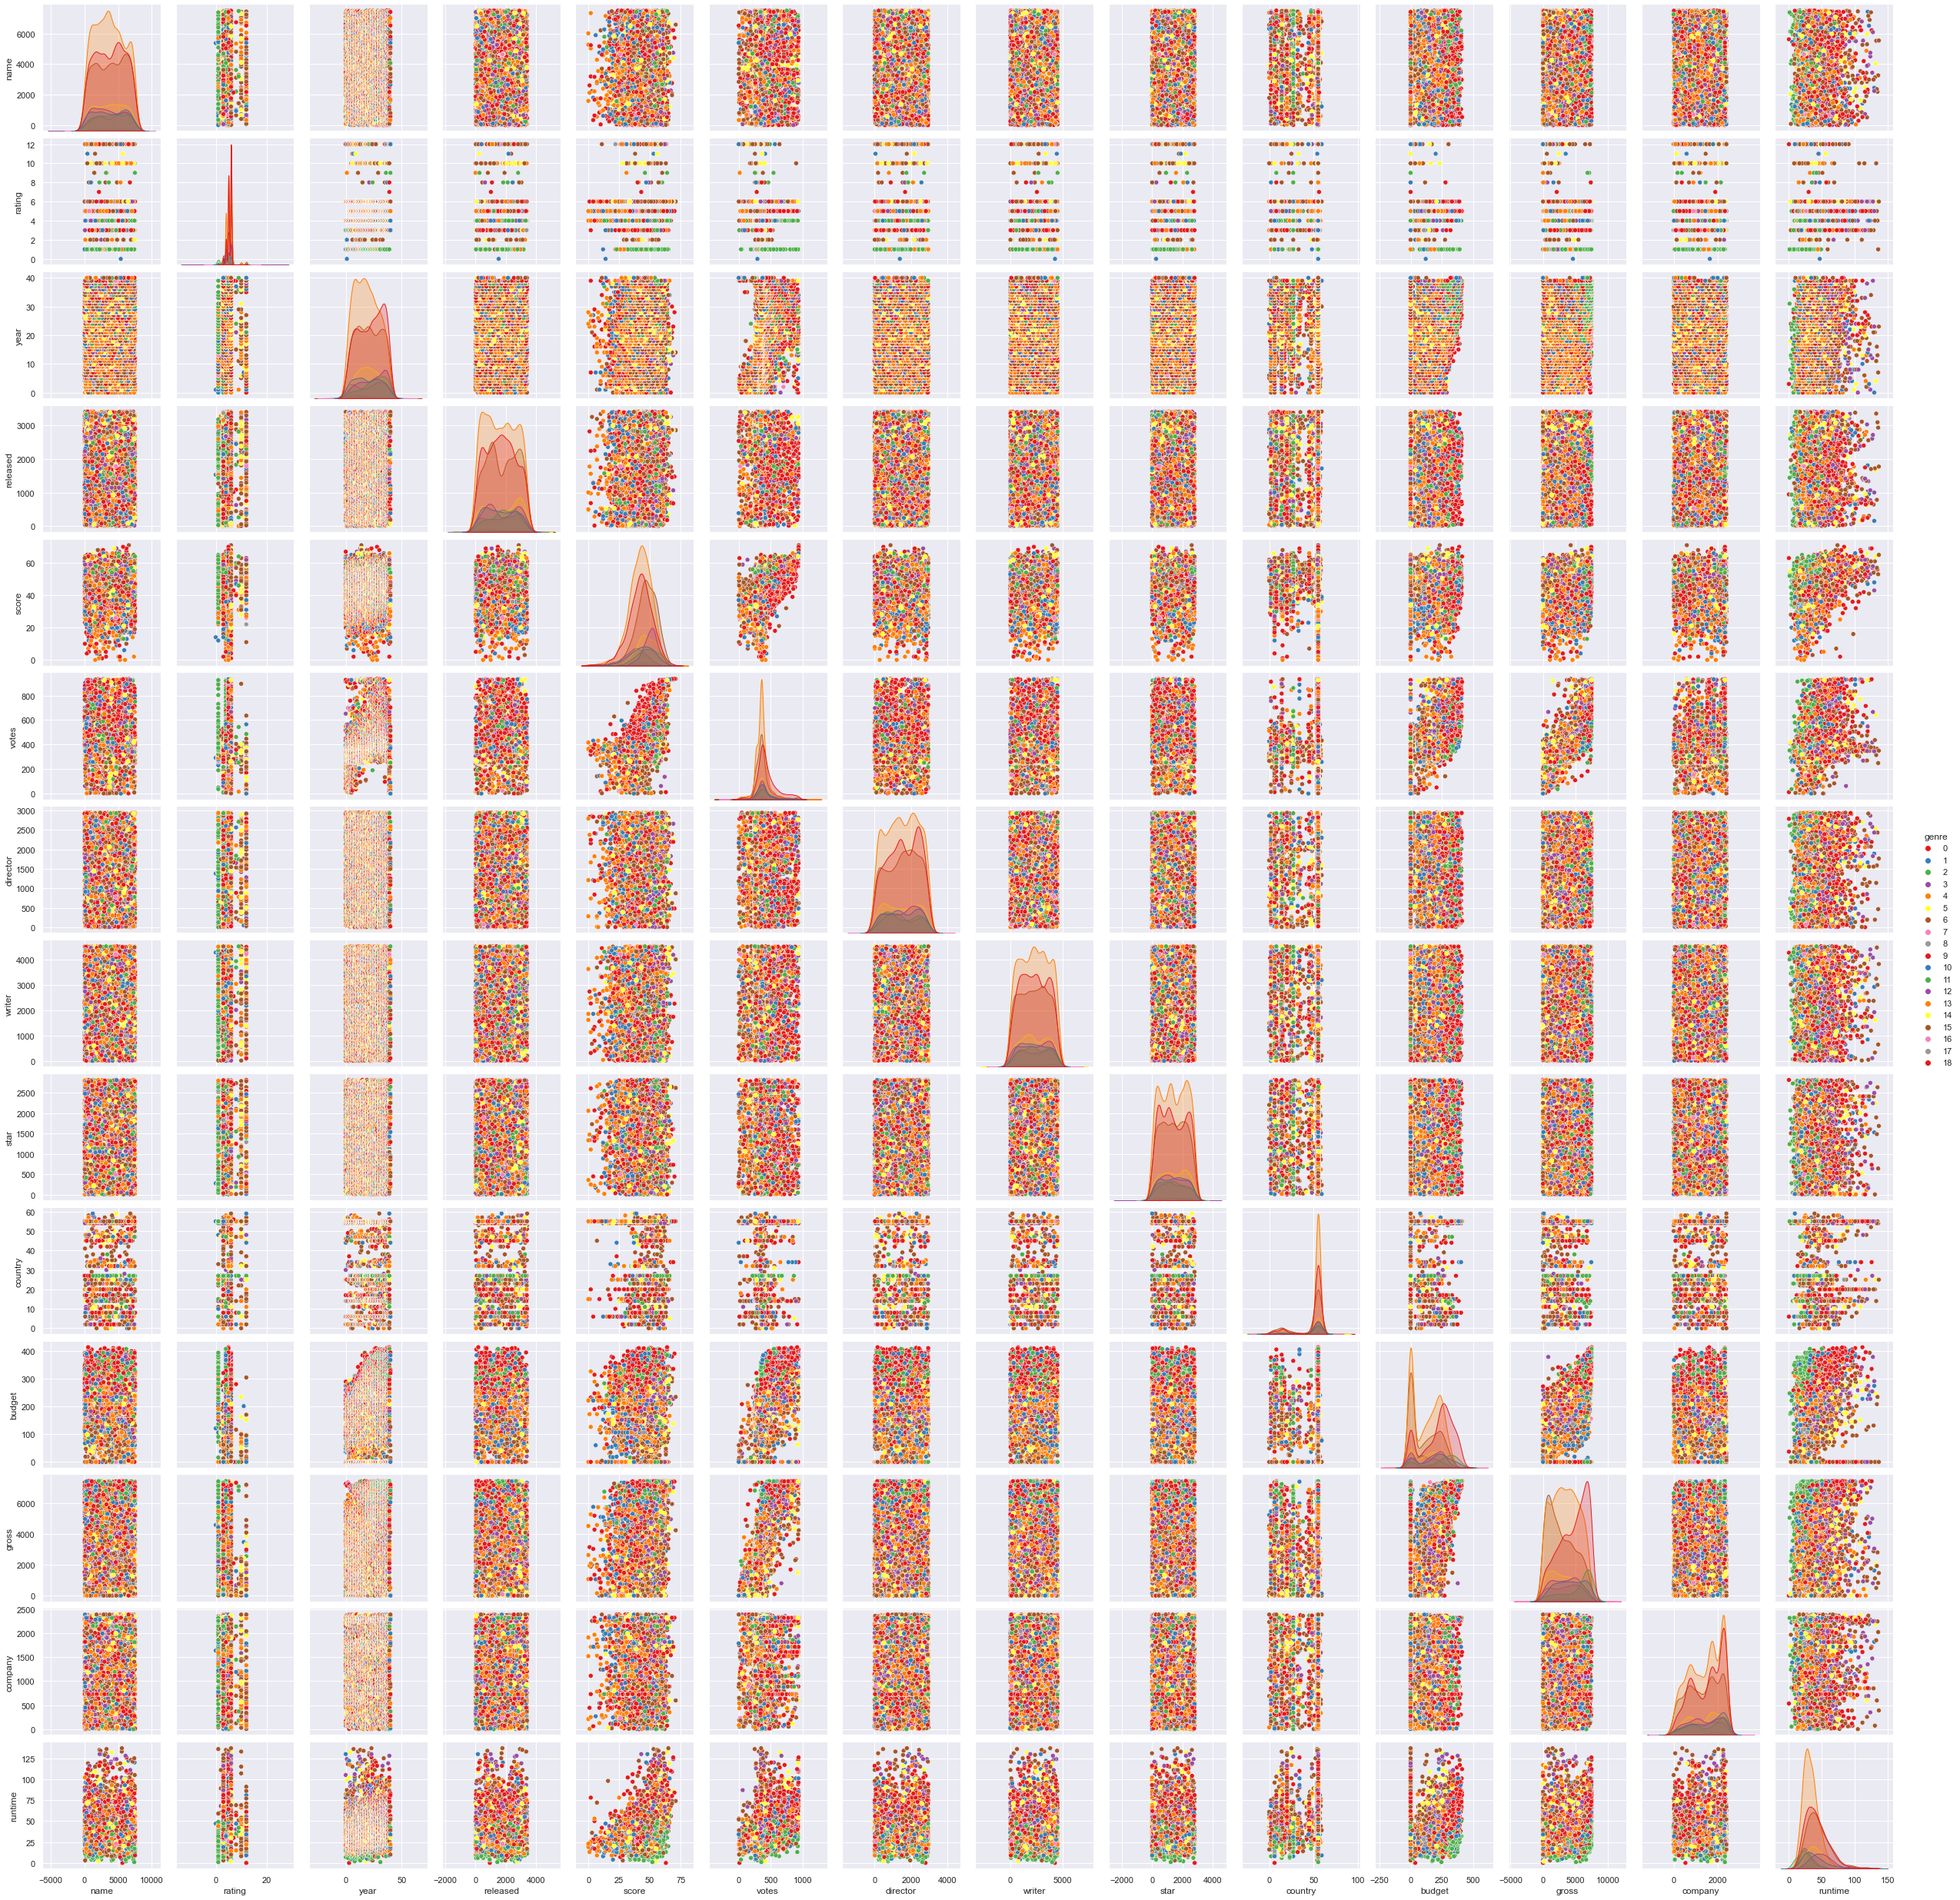

In [74]:
sns.pairplot(df,hue='genre',palette='Set1')

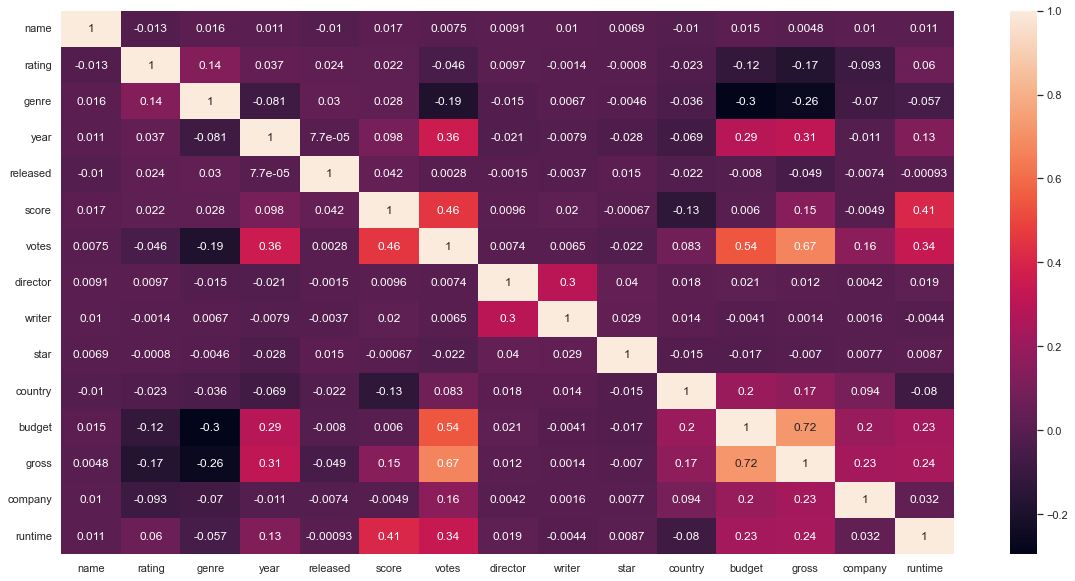

In [80]:
sns.heatmap(df.corr(),annot = True)
sns.set(rc = {'figure.figsize':(20,10)})

In [81]:
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head(10)       

name  rating  genre  year  released  score  votes  director  writer  star  \
0  6587       6      6     0      1705     64    915      2589    4014  1047   
1  5573       6      1     0      1492     38    394      2269    1632   327   
2  5142       4      0     0      1771     67    928      1111    2567  1745   
3   286       4      4     0      1492     57    549      1301    2000  2246   
4  1027       6      4     0      1543     53    437      1054     521   410   
5  2109       6     10     0      2502     44    452      2528    4362   241   
6  5574       6      0     0      1771     59    516      1412     838  1277   
7  4436       6      3     0       699     62    652      1829    1769  2240   
8  5281       4      0     0      1753     48    430      2306    1979   877   
9  6213       6      3     0      2286     50    339      2864     423   589   

   country  budget  gross  company  runtime  
0       54     212   4975     2319       78  
1       55      99   5275      731       36  
2       55     208   7284     1540       56  
3       55      88   5722     1812       20  
4       55     116   4725     1777       30  
5       55      48   4723     1812       27  
6       55     240   6115     2281       65  
7       55     208   3963      631       61  
8       55     289   6050      883       59  
9       55     152   3359     2272       32

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   name      7668 non-null   int64
 1   rating    7668 non-null   int64
 2   genre     7668 non-null   int64
 3   year      7668 non-null   int64
 4   released  7668 non-null   int64
 5   score     7668 non-null   int64
 6   votes     7668 non-null   int64
 7   director  7668 non-null   int64
 8   writer    7668 non-null   int64
 9   star      7668 non-null   int64
 10  country   7668 non-null   int64
 11  budget    7668 non-null   int64
 12  gross     7668 non-null   int64
 13  company   7668 non-null   int64
 14  runtime   7668 non-null   int64
dtypes: int64(15)
memory usage: 898.7 KB


In [83]:
df1 = df.drop(columns=['genre'],axis =1)

In [84]:
df2 = df['genre']

In [85]:
chi_score= chi2(df1,df2)
chi_score

(array([3.77266473e+04, 3.61442077e+02, 1.52144101e+03, 2.52962969e+04,
        1.63674926e+03, 2.34224879e+04, 1.02469865e+04, 2.17953176e+04,
        1.38381806e+04, 7.04859555e+02, 9.59672117e+04, 1.13966713e+06,
        3.05588388e+04, 8.66569267e+03]),
 array([0.00000000e+000, 9.63713159e-066, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 5.28074727e-138, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000]))

<AxesSubplot:>

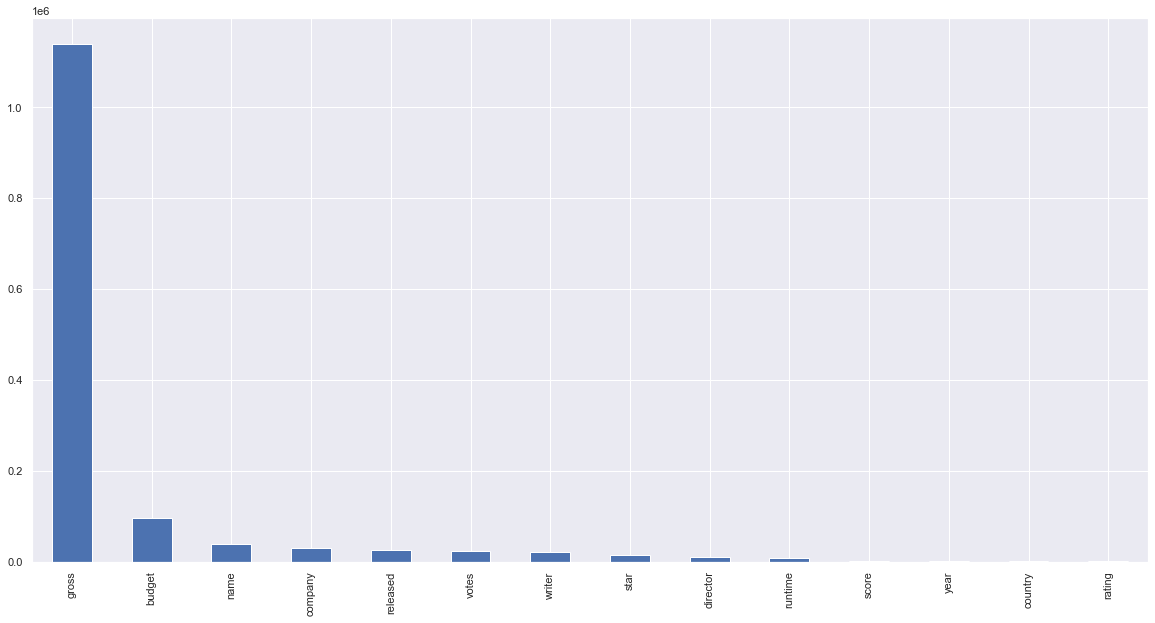

In [86]:
chi_values = pd.Series(chi_score[0],index = df1.columns)
chi_values.sort_values(ascending=False,inplace = True)
chi_values.plot.bar()

<AxesSubplot:>

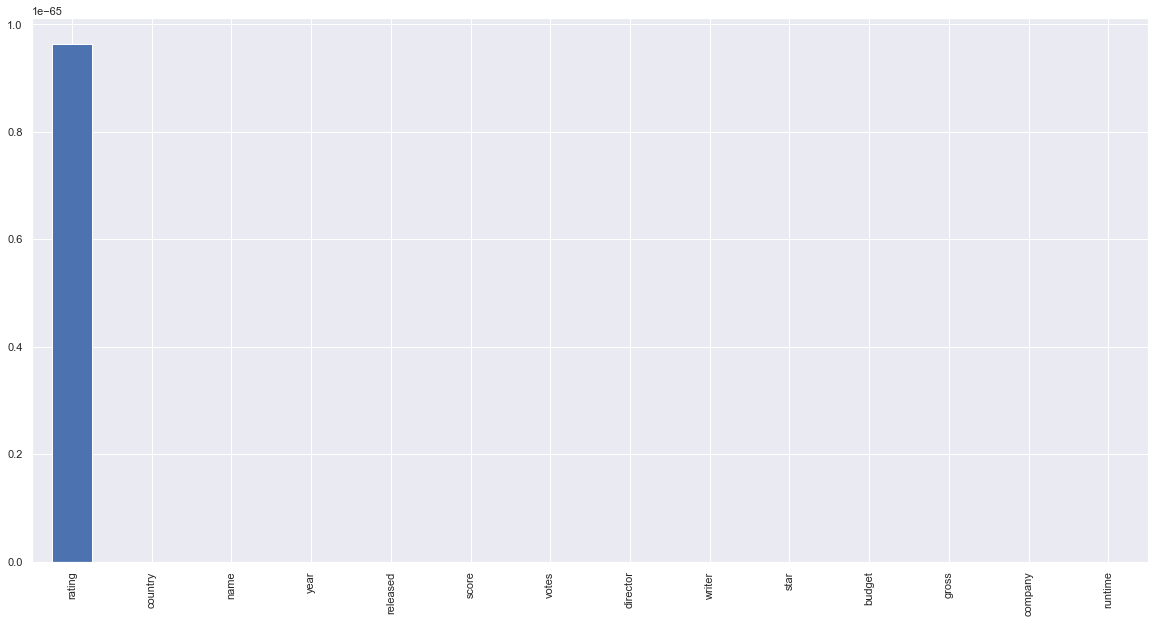

In [87]:
#for p values
p_values = pd.Series(chi_score[1],df1.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()

In [88]:
x = df.drop(columns=['country','genre'])
x.shape

(7668, 13)

In [89]:
y = df['genre']
y.shape

(7668,)

In [90]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

In [92]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [93]:
predictions = rfc.predict(x_test)
predictions

array([0, 6, 4, ..., 4, 6, 6], dtype=int64)

In [94]:
print(confusion_matrix(y_test,predictions))

[[349   4   4   3 243   0  64   0   0   0   6   0   0   0   0   0   0]
 [ 23   6  10   1  93   0  29   0   0   0   2   0   0   0   0   0   0]
 [  5   2  98   0  28   0  12   0   0   0   0   0   0   0   0   0   0]
 [ 20   0   1  23  57   1  81   0   0   0   1   0   0   0   0   0   0]
 [136   2   6   4 578   4 126   0   0   0  10   0   0   0   0   0   0]
 [ 46   0   0   6  90   5  91   0   0   0   5   0   0   0   0   0   0]
 [ 78   0   3  10 249   7 256   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   4   0   2   0   0   0   0   0   0   0   0   0   0]
 [  3   1   0   0  10   1   2   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [ 27   0   0   0  73   1  10   0   0   0  21   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   4   0   5   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3   0   2   0   0   0   0   0   0   0   0   0   0]
 [  0 

In [95]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.51      0.52      0.51       673
           1       0.40      0.04      0.07       164
           2       0.80      0.68      0.73       145
           3       0.49      0.12      0.20       184
           4       0.40      0.67      0.50       866
           5       0.26      0.02      0.04       243
           6       0.37      0.42      0.40       603
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00        17
           9       0.00      0.00      0.00         1
          10       0.46      0.16      0.24       132
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         4
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00         3

    accuracy              

C:\Users\Aviral Trivedi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aviral Trivedi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aviral Trivedi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
d_tree = DecisionTreeClassifier()
d_tree.fit(x_test,y_test)

DecisionTreeClassifier()

In [97]:
d_pred = d_tree.predict(x_test)
d_pred

array([0, 6, 4, ..., 6, 5, 3], dtype=int64)

In [98]:
print(confusion_matrix(y_test,d_pred))

[[673   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 164   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 145   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 184   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 866   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 243   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 603   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   6   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  17   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 132   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   5   0   0   0]
 [  0 

In [99]:
print(classification_report(y_test,d_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       673
           1       1.00      1.00      1.00       164
           2       1.00      1.00      1.00       145
           3       1.00      1.00      1.00       184
           4       1.00      1.00      1.00       866
           5       1.00      1.00      1.00       243
           6       1.00      1.00      1.00       603
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00       132
          11       1.00      1.00      1.00         1
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         4
          17       1.00      1.00      1.00        10
          18       1.00      1.00      1.00         3

    accuracy              